# In this notebook we have all necessary to test the 2 PI-DICOM endpointS ONLINE and BATCH

In [1]:
import requests
import json
import os
import pydicom
from pydicom.dataelem import DataElement
import base64
import glob
from pathlib import Path
import matplotlib.pyplot as plt


In [2]:
def compare_dicom_images(
    instance_original: pydicom.dataset.FileDataset,
    instance_redacted: pydicom.dataset.FileDataset,
    figsize: tuple = (11, 11)
) -> None:
    """Display the DICOM pixel arrays of both original and redacted as images.

    Args:
        instance_original (pydicom.dataset.FileDataset): A single DICOM instance (with text PHI).
        instance_redacted (pydicom.dataset.FileDataset): A single DICOM instance (redacted PHI).
        figsize (tuple): Figure size in inches (width, height).
    """
    _, ax = plt.subplots(1, 2, figsize=figsize)
    ax[0].imshow(instance_original.pixel_array, cmap="gray")
    ax[0].set_title('Original')
    ax[1].imshow(instance_redacted.pixel_array, cmap="gray")
    ax[1].set_title('Redacted')

In [3]:
files = {'file': open('0_ORIGINAL.dcm','rb')}

In [4]:
files

{'file': <_io.BufferedReader name='0_ORIGINAL.dcm'>}

In [5]:
url = "http://127.0.0.1:8155/process-dicom-image"


In [6]:
files = {'file': open('0_ORIGINAL.dcm','rb')}
r = requests.post(url, files=files)

In [7]:
out = r.json()

In [8]:
# Decode the base64 string and save it as a DICOM file
encoded_dicom = out['redacted_instance']
decoded_dicom = base64.b64decode(encoded_dicom)

with open('redacted_output_2.dcm', 'wb') as f:
    f.write(decoded_dicom)

print("Redacted DICOM image saved as 'redacted_output.dcm'")

Redacted DICOM image saved as 'redacted_output.dcm'


In [9]:
# Load in and process your DICOM file as needed
dicom_instance = pydicom.dcmread('0_ORIGINAL.dcm')

In [10]:
dicom_instance

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 184
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 2.25.112784503178059210578740147414000844278
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'POST_PROCESSED', 'RT', '', '', '', '', '100000']
(0008,0016) SOP Class UID                       UI: Computed Radiography Image Storage
(0008,0018) SOP Instance UID                    UI: 2.25.112784503178059210578740147414000844278
(0008,0020) Stu

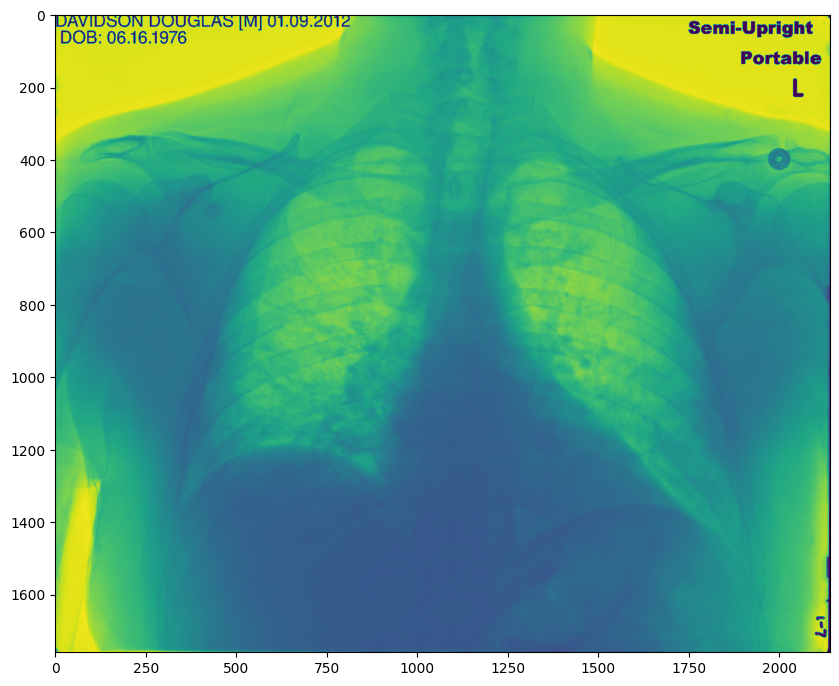

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(dicom_instance.pixel_array)

In [12]:
# Load in and process your DICOM file as needed
dicom_instance_redacted = pydicom.dcmread('redacted_output_2.dcm',force=True)

In [13]:
dicom_instance_redacted

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 184
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 2.25.112784503178059210578740147414000844278
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002,0013) Implementation Version Name         SH: '0.5'
(0002,0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008,0008) Image Type                          CS: ['DERIVED', 'PRIMARY', 'POST_PROCESSED', 'RT', '', '', '', '', '100000']
(0008,0016) SOP Class UID                       UI: Computed Radiography Image Storage
(0008,0018) SOP Instance UID                    UI: 2.25.112784503178059210578740147414000844278
(0008,0020) Stu

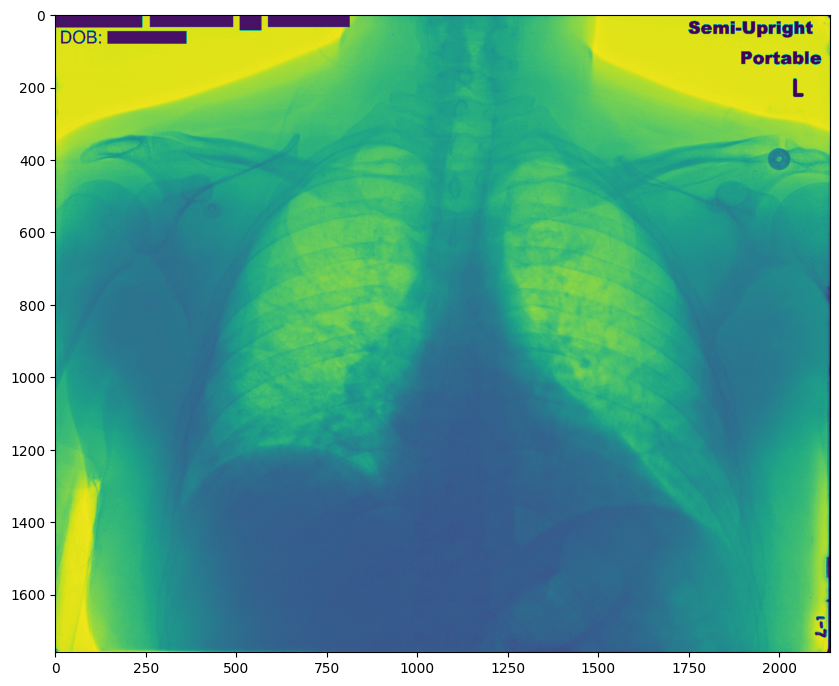

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(dicom_instance_redacted.pixel_array)

In [18]:
data = {}
data['folder_in'] = 'dicom_modified'
data['folder_out'] = 'dicom_modified_output'

In [17]:
data1 =  json.dumps(data).encode()

In [20]:
url = "http://127.0.0.1:8155/process-dicom-folder"


In [ ]:
r = requests.post(url, data=data1)

In [22]:
r.json()

{'status': False}